<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Parcial%201_final/Punto_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL 1**
# **CH.4 Derivación e integración numérica**

 **Punto 7: Minimización del camino óptico**

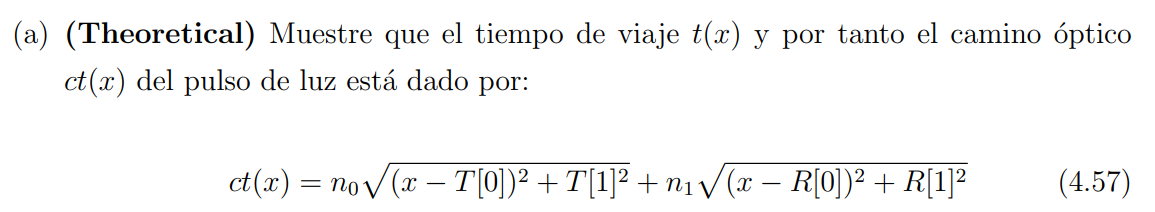

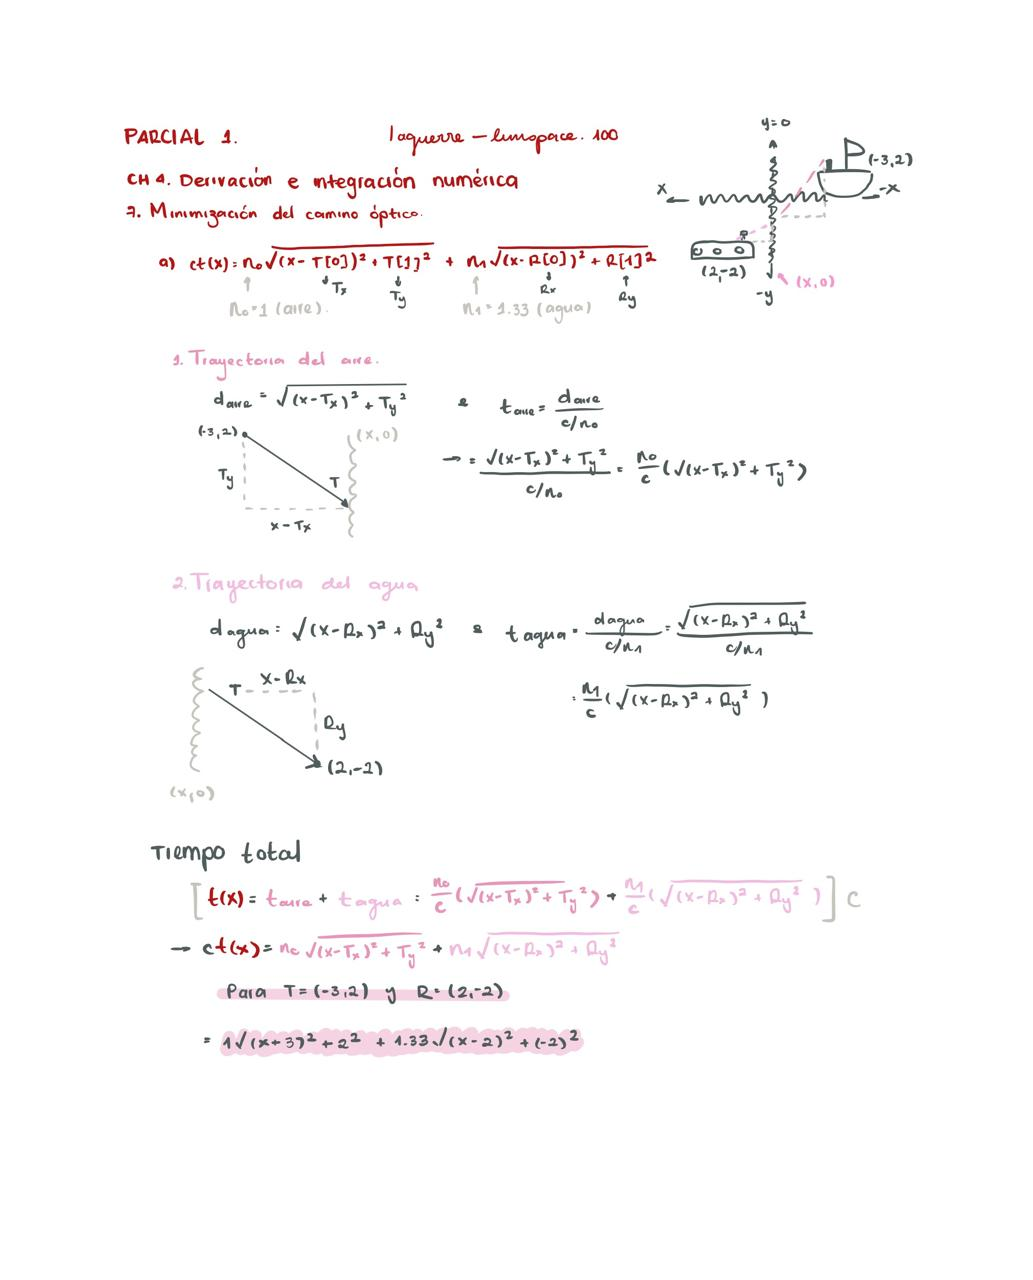

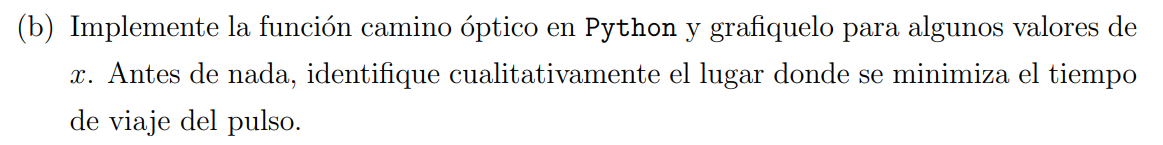

El valor de x que minimiza el tiempo de viaje es: 0.0


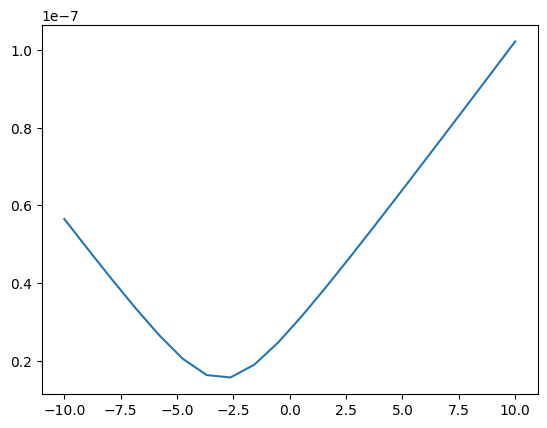

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

X = np.linspace(-10,10,20,endpoint=True)
T = np.array([-3,2])
R = np.array([2,-2])

c = 3 * 10**8
n_aire = 1
n_agua = 1.33

h = 1e-5
epsilon = 1e-9

def camino_optico (x:float)->float:
  dA = np.sqrt((x-T[0])**2 + R[1]**2)
  dB = np.sqrt((x-T[0])**2 + R[1]**2)

  tiempo_total = ((n_aire*dA) + (n_agua*dB))/c

  return tiempo_total


def resultado_cualitativo (x):
  dA = np.sqrt((x-T[0])**2 + R[1]**2)
  dB = np.sqrt((x-T[0])**2 + R[1]**2)

  deriv_aire = (n_aire / c) * (x - T[0]) / dA
  deriv_agua = (n_agua / c) * (x - R[0]) / dB


  return deriv_aire + deriv_agua

solucion_cualitativa = root_scalar(resultado_cualitativo, bracket=[-5, 5], method='bisect')

#Solucion cualitativa alterna

resultado = minimize(camino_optico, x0=0)
print(f"El valor de x que minimiza el tiempo de viaje es: {resultado.x[0]}")

Tiempo_para_x = np.array([camino_optico(x) for x in X])

plt.plot(X,Tiempo_para_x)
plt.show()



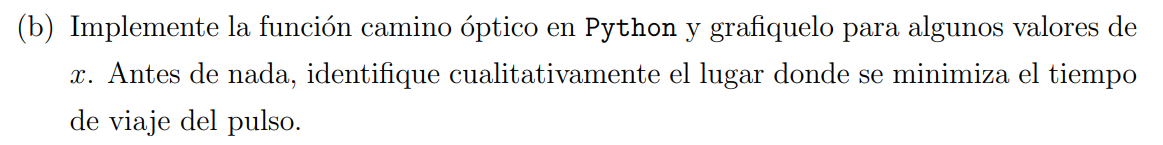

In [21]:
def primera_derivada(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def segunda_derivada(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

def newton_raphson(f, x0, h, epsilon):
    x = x0
    while True:
        f_1 = primera_derivada(f, x, h)
        f_2 = segunda_derivada(f, x, h)
        x_nueva = x - f_1 / f_2

        if abs(x_nueva - x) < epsilon:
            break
        x = x_nueva
    return x


      converged: True
           flag: converged
 function_calls: 45
     iterations: 43
           root: -0.14592274678193462
         method: bisect

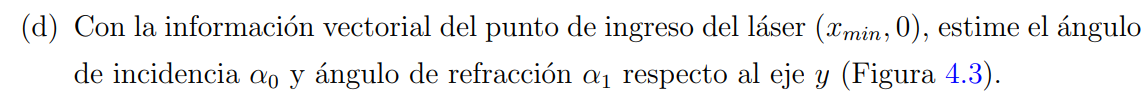

In [ ]:
x_min = newton_raphson(camino_optico, x0, h, epsilon)
t_min = camino_optico(x_min)

alpha_0 = np.arctan((T[0] - x_min) / T[1])
alpha_1 = np.arctan((R[0] - x_min) / abs(R[1]))

alpha_0_deg = np.degrees(alpha_0)
alpha_1_deg = np.degrees(alpha_1)

print (f"El valor de alpha_0 es: {alpha_0_deg} grados")
print (f"El valor de alpha_1 es: {alpha_1_deg} grados")


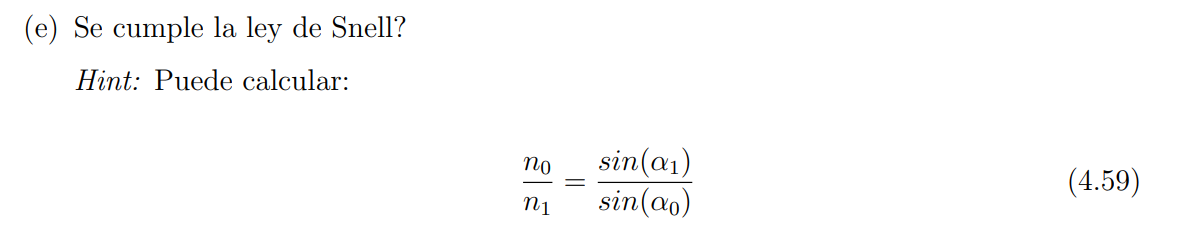

In [ ]:

def cumple_snell():
  if (n_aire/n_agua) == (alpha_1/alpha_0):
    return True
  else:
    return False

cumple_snell()
